## Import Packages

In [3]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd
import shutil

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping


## Image Train Test Split (run once)

In [9]:
# Define the path to your .zip file
zip_file_path = 'train.zip'
extraction_root = 'extracted_data'

os.makedirs(extraction_root, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_root)

def folder_to_dataframe(folder_path):
    files = os.listdir(folder_path)
    return pd.DataFrame({'File Name': files, 'Folder': folder_path})

folders = ['train', 'test', 'validation']
dataframes = {}

for folder in folders:
    folder_path = os.path.join(extraction_root, folder)
    if os.path.exists(folder_path):
        dataframes[folder] = folder_to_dataframe(folder_path)
    else:
        print(f"Folder '{folder}' does not exist in the zip file.")

Processing category: project156.ipynb with 1 images


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [11]:
test_df = dataframes['test']
print(test_df.head())
train_df = dataframes['train']
print(train_df.head())
validation_df = dataframes['validation']
print(validation_df.head())


Processing category: cats
Processing category: dogs
Processing category: panda
Validation set successfully created!


In [ ]:
extraction_root = 'extracted_data'
test_dir = os.path.join(extraction_root, 'test')
print(f"Test directory: {test_dir}")
train_dir = os.path.join(extraction_root, 'train')
print(f"Train directory: {train_dir}")
val_dir = os.path.join(extraction_root, 'validation')
print(f"Validation directory: {val_dir}")


## Directory Moving

In [40]:
filenames = os.listdir(base_dir)
labels = [x.split("_")[0] for x in filenames]

data_main = pd.DataFrame({"filename": filenames, "label": labels})

data_main.head()

,filename,label
0,.ipynb_checkpoints,.ipynb
1,animals,animals
2,project156.ipynb,project156.ipynb
3,test,test
4,train,train


In [41]:
filenames = os.listdir(train_dir)
labels = [x.split("_")[0] for x in filenames]

data_train = pd.DataFrame({"filename": filenames, "label": labels})

data_train.head()

,filename,label
0,cats_00001.jpg,cats
1,cats_00002.jpg,cats
2,cats_00003.jpg,cats
3,cats_00004.jpg,cats
4,cats_00007.jpg,cats


In [42]:
filenames = os.listdir(test_dir)
labels = [x.split("_")[0] for x in filenames]

data_test = pd.DataFrame({"filename": filenames, "label": labels})

data_test.head()

,filename,label
0,cats_00006.jpg,cats
1,cats_00008.jpg,cats
2,cats_00029.jpg,cats
3,cats_00037.jpg,cats
4,cats_00049.jpg,cats


In [43]:
filenames = os.listdir(validation_dir)
labels = [x.split("_")[0] for x in filenames]

data_val = pd.DataFrame({"filename": filenames, "label": labels})

data_val.head()

,filename,label
0,cats_00005.jpg,cats
1,cats_00032.jpg,cats
2,cats_00036.jpg,cats
3,cats_00042.jpg,cats
4,cats_00044.jpg,cats


In [44]:
train_dir = "/Users/julia/OneDrive/Desktop/Ju's Illegal Folder/Homework/Math 156/project156/train"
test_dir = "/Users/julia/OneDrive/Desktop/Ju's Illegal Folder/Homework/Math 156/project156/test"
val_dir="/Users/julia/OneDrive/Desktop/Ju's Illegal Folder/Homework/Math 156/project156/validation"

## Category Organize

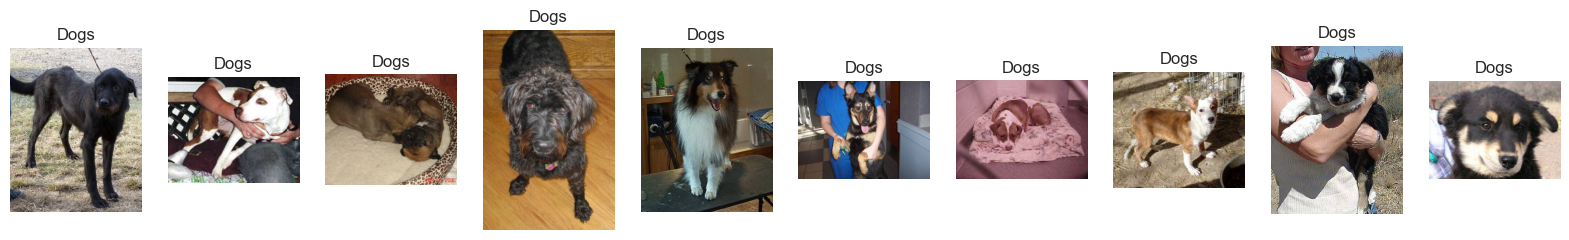

In [119]:
category = "dogs"

image_filenames = [f for f in os.listdir(train_dir) if f.startswith(f"{category}_") and f.endswith('.jpg')]

num_images = min(len(image_filenames), 10)

plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(num_images):
    filename = os.path.join(train_dir, image_filenames[i])
    image = imread(filename)
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.title(category.capitalize(), fontsize=12)
    plt.axis('off')

plt.show()

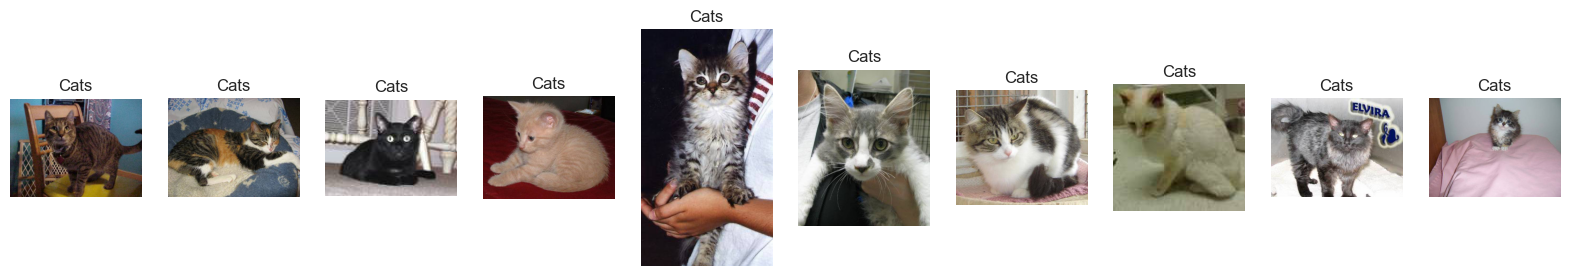

In [120]:
category = "cats"

image_filenames = [f for f in os.listdir(train_dir) if f.startswith(f"{category}_") and f.endswith('.jpg')]

num_images = min(len(image_filenames), 10)

plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(num_images):
    filename = os.path.join(train_dir, image_filenames[i])
    image = imread(filename)
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.title(category.capitalize(), fontsize=12)
    plt.axis('off')

plt.show()

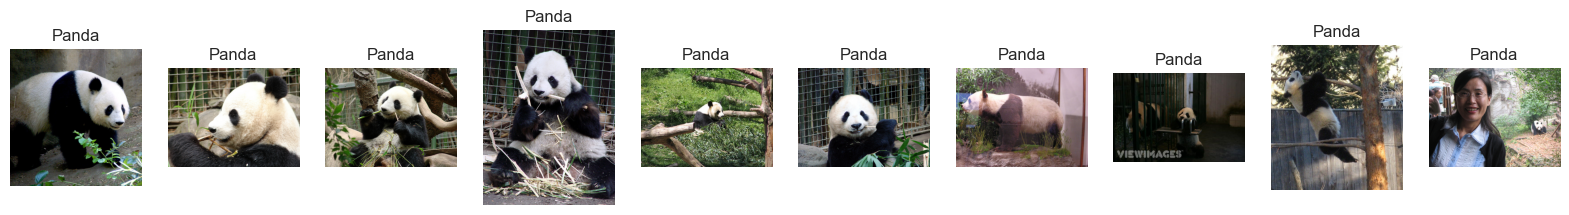

In [121]:
category = "panda"

image_filenames = [f for f in os.listdir(train_dir) if f.startswith(f"{category}_") and f.endswith('.jpg')]

num_images = min(len(image_filenames), 10)

plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(num_images):
    filename = os.path.join(train_dir, image_filenames[i])
    image = imread(filename)
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.title(category.capitalize(), fontsize=12)
    plt.axis('off')

plt.show()

## Alter Training Data

In [48]:
image_size = 128
image_channel = 3
bat_size = 32

In [49]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1) #alter the training data to account for altered images to prevent overfit

test_datagen = ImageDataGenerator(rescale=1./255)

In [50]:
train_generator = train_datagen.flow_from_dataframe(data_train,
                                                    directory = train_dir,
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )
val_generator = test_datagen.flow_from_dataframe(data_val,
                                                 directory = val_dir,
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(data_test,
                                                  directory = test_dir,
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 2400 validated image filenames belonging to 3 classes.
Found 300 validated image filenames belonging to 3 classes.
Found 300 validated image filenames belonging to 3 classes.


## Constructing CNN

In [51]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel))) #32 filters
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) #randomly removes 20% of neurons to reduce overfit

# Block 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3,activation='softmax'))

model.summary()

C:\Users\julia\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,113,027 (19.50 MB)

 Trainable params: 5,111,043 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

## Apply Training to Model

In [52]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

In [53]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
cat_dog_panda = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 30,
                    steps_per_epoch = len(train_generator),
                    validation_steps = len(val_generator),
                   )

C:\Users\julia\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.5658 - loss: 1.4164 - val_accuracy: 0.3333 - val_loss: 6.3023 - learning_rate: 0.0010
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 72s 951ms/step - accuracy: 0.6518 - loss: 0.7923 - val_accuracy: 0.3367 - val_loss: 2.2893 - learning_rate: 0.0010
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 72s 963ms/step - accuracy: 0.6770 - loss: 0.7281 - val_accuracy: 0.3300 - val_loss: 3.1743 - learning_rate: 0.0010
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.6766 - loss: 0.6773
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
75/75 ━━━━━━━━━━━━━━━━━━━━ 71s 951ms/step - accuracy: 0.6768 - loss: 0.6771 - val_accuracy: 0.3333 - val_loss: 4.0770 - learning_rate: 0.0010
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 874ms/step - accuracy: 0.7120 - loss: 0.6174 - val_accuracy: 0.3667 - val_loss: 1.8877 - learning_rate: 5.0000e-04
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 874ms/step - accuracy: 0.7244 - loss: 0.

## Accuracy and Error

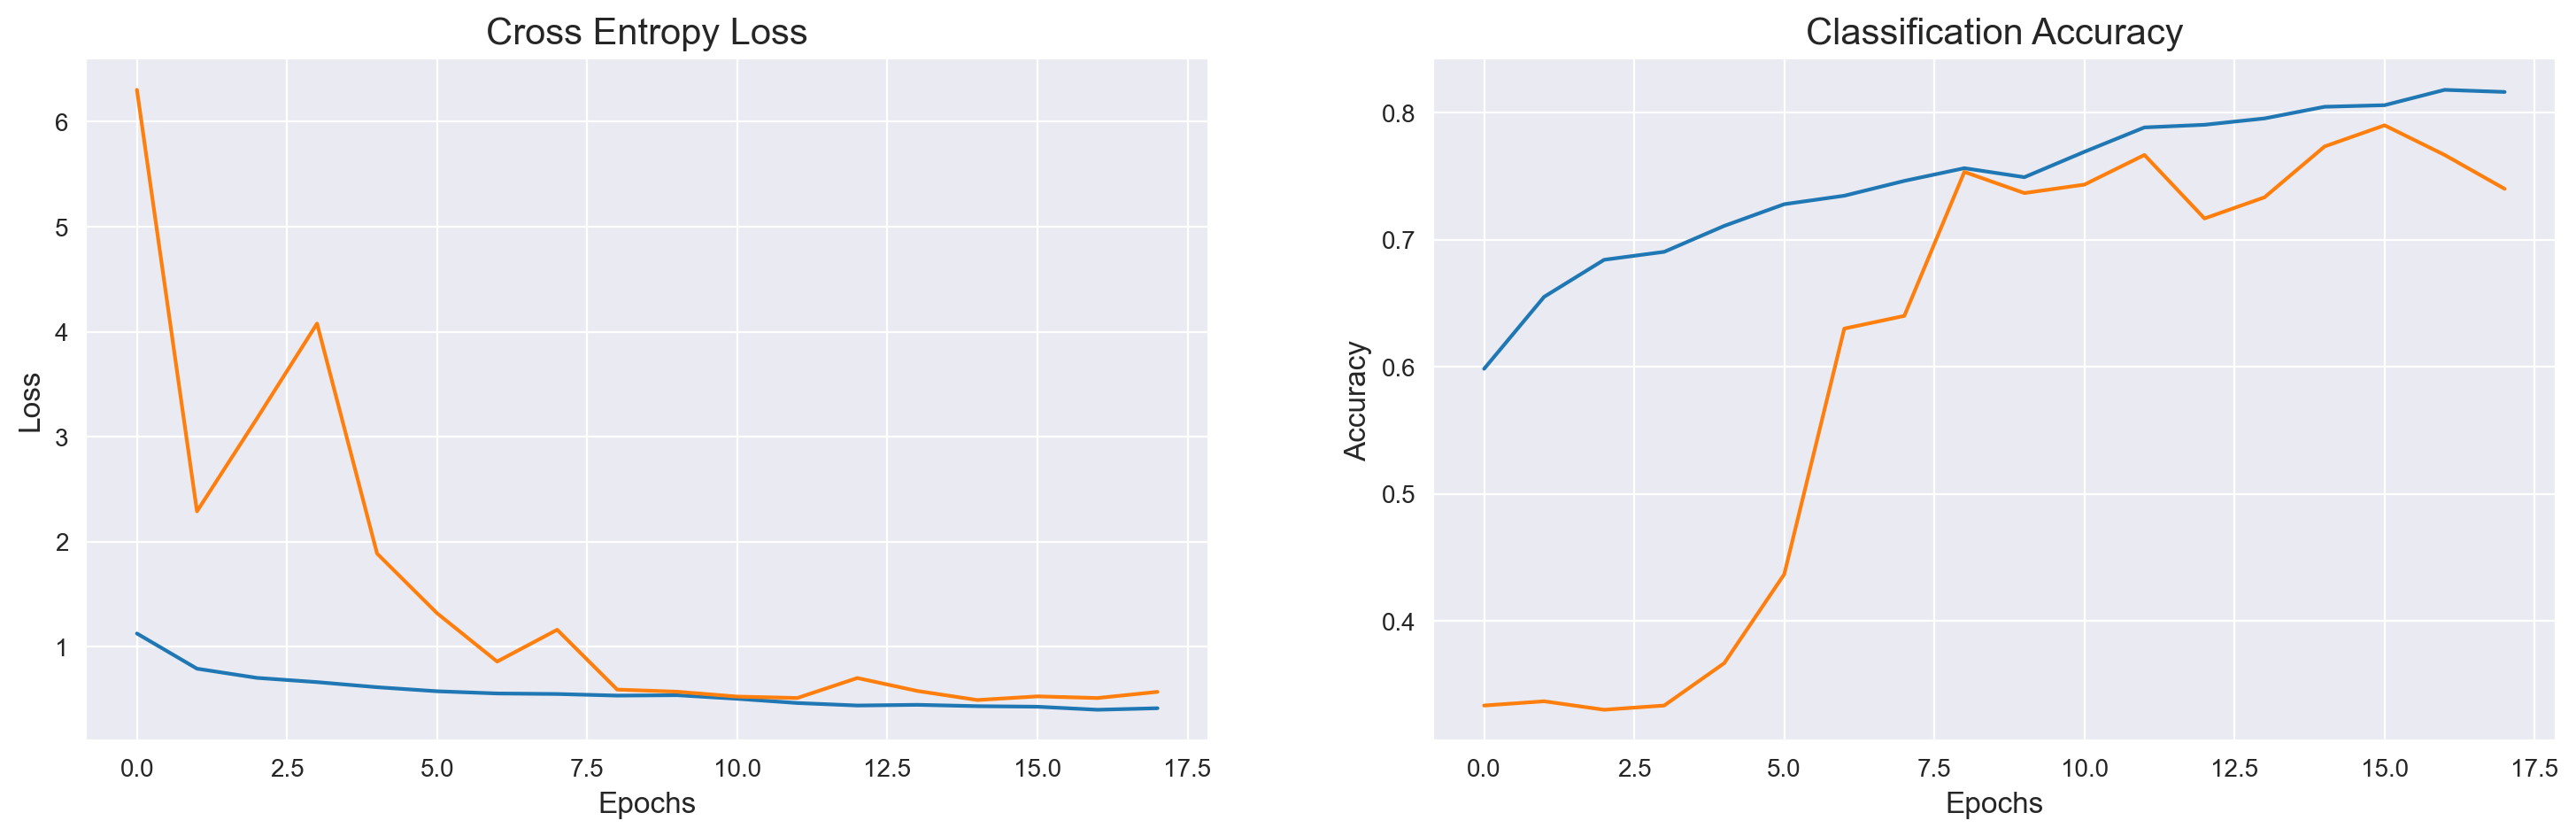

In [156]:
error = pd.DataFrame(cat_dog_panda.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [157]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 77.33333110809326
The Loss of the model for training data is: 0.47733205556869507
The accuracy of the model for validation data is: 77.33333110809326
The Loss of the model for validation data is: 0.49308401346206665


## Save Model

In [57]:
model.save("model.h5")

In [158]:
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 77.99999713897705
The Loss of the model for testing data is: 0.47610366344451904


In [159]:
labels =['Cat','Dog', 'Panda']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.66      0.89      0.76       100
         Dog       0.81      0.51      0.63       100
       Panda       0.92      0.94      0.93       100

    accuracy                           0.78       300
   macro avg       0.80      0.78      0.77       300
weighted avg       0.80      0.78      0.77       300



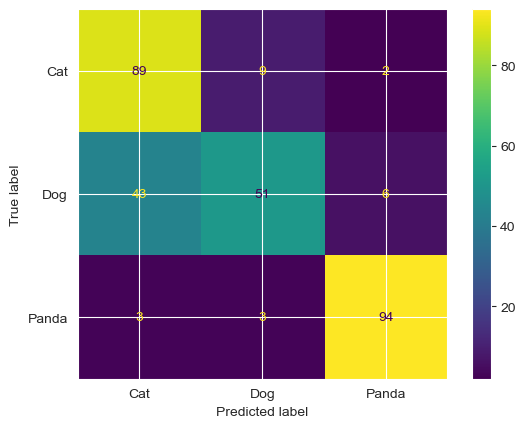

In [176]:
confusion_mtx = confusion_matrix(y_true,y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mtx, display_labels = ["Cat", "Dog", "Panda"])


cm_display.plot()
plt.show()